# Bigmart Sales Prediction 
(Regression)

### 1. Introduction 

The data collected by BigMart contains sales data for 1559 products accress 10 different stores in 2013.


In [1]:
# Load modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Loading data 
path = "B:\Coding_Stuff\Tensor_Projects\Machine Learning Project 51 - Bigmart Sales Prediction Analysis - Regression\Train.csv"
data = pd.read_csv(path)
data.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# statistical analysis 
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# attribute details 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 2.Data Wrangling


In [5]:
# check the number of unique values in data
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
# categorical columns 
cat_columns = data.select_dtypes(include=['object']).columns.tolist()
# numerical columns 
num_columns = data.select_dtypes(exclude=['object']).columns.tolist()
# drop unwanted columns
cat_columns.remove('Item_Identifier')
cat_columns.remove('Outlet_Identifier')

In [7]:
# checking for missing values
print(data.isna().sum())
#filling in missing values 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [8]:
# Check the categoires in each categorical columns 
for columns in cat_columns:
    print(data[columns].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


Its clear that each categorical columns have many categories of data in it , when filling missing values we have to take mean of "each" category and impute/use them accordingly. 


Creating a pivot table to get aggregate view of the dataframe and also calculate the values needed for filling missing instance.

In [9]:
# Generating the pivot table 
item_weight_mean = data.pivot_table(values = "Item_Weight", index ='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [10]:
import warnings
warnings.filterwarnings('ignore')
# Creating a vector of boolean values for getting index of missing data points.
miss_bool = data['Item_Weight'].isnull()

for i,item in enumerate(data['Item_Identifier']):
        if miss_bool[i]:
            
            # cheking missing instances 
            if item in item_weight_mean.index:
                data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']

            # incase any slip out or not in item_weight_mean
            else:
                data['Item_Weight'][i] = np.mean(data['Item_Weight']) 

# check for nul values 
data['Item_Weight'].isnull().sum()

0

In [11]:
outlet_size_mode = data.pivot_table(values="Outlet_Size", columns= 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [12]:
# Filling missing values using mode as Outlet_Size is categorical
miss_bool = data['Outlet_Size'].isnull()
data.loc[miss_bool, 'Outlet_Size'] = data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
data['Outlet_Size'].isnull().sum()

0

In [13]:
print("The null value count in Item_Visibility" ,data.Item_Visibility.isnull().sum())
print("number of Item_Visibility intance where it's zero" ,sum(data.Item_Visibility == 0))

The null value count in Item_Visibility 0
number of Item_Visibility intance where it's zero 526


In [14]:
# replacing zeros with mean 
data.Item_Visibility.replace(0, data.Item_Visibility.mean(), inplace=True)
print("number of Item_Visibility intance where it's zero" ,sum(data.Item_Visibility == 0))

number of Item_Visibility intance where it's zero 0


In [15]:
print(data['Item_Fat_Content'].unique())
# lot of reduncancy needs to be cleaned up

data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat'},inplace=True)
print("After replacing " ,data['Item_Fat_Content'].unique())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
After replacing  ['Low Fat' 'Regular']


### 3.Feature Engineerning

In [16]:
print("Number of unique values ",len(data.Item_Identifier.unique()))
print("Unique values ", data.Item_Identifier.unique())
# Create a new attribute 
data['New attribute'] = data.Item_Identifier.apply(lambda x: x[:2])
data['New attribute']

Number of unique values  1559
Unique values  ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New attribute, Length: 8523, dtype: object

In [17]:
data['New attribute'] = data["New attribute"].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['New attribute'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New attribute, dtype: int64

In [18]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New attribute
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


### 4. Exploratory Data Analysis

<Axes: xlabel='Item_Weight', ylabel='Density'>

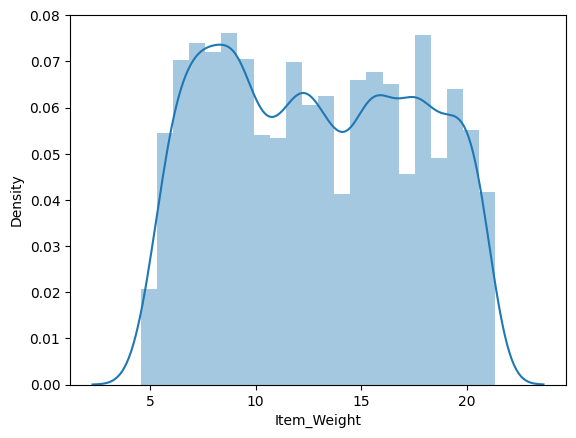

In [19]:
sns.distplot(data["Item_Weight"])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

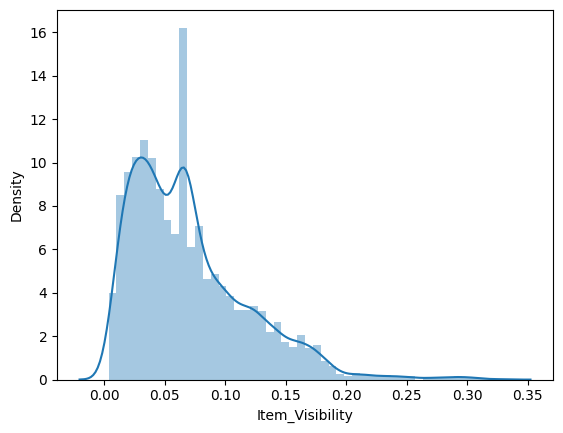

In [20]:
sns.distplot(data.Item_Visibility)

<Axes: xlabel='Item_MRP', ylabel='Density'>

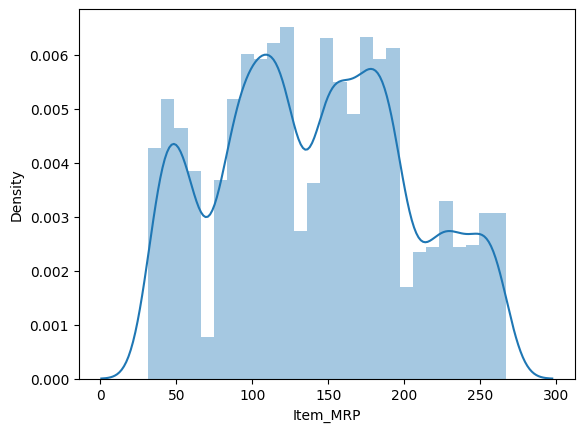

In [21]:
sns.distplot(data.Item_MRP)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

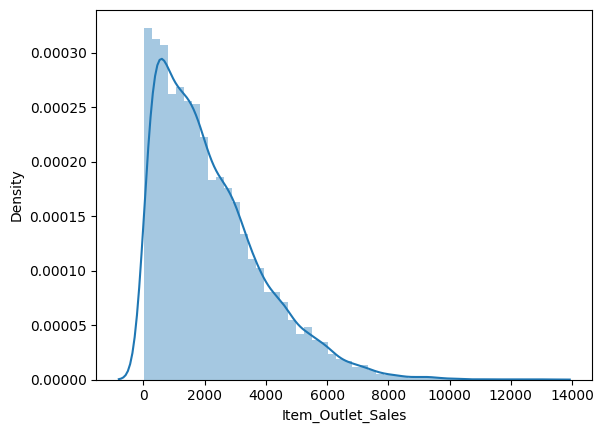

In [22]:
sns.distplot(data['Item_Outlet_Sales'])

 Skewed data can make it difficult to analyze the data accurately, as many statistical tests assume that the data is normally distributed.
 
The np log transform can help to make data more normal by converting the values into a logarithmic scale. This has the effect of stretching out the tail of the distribution, making it more symmetric. As a result, statistical tests can be applied to the data more accurately.

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

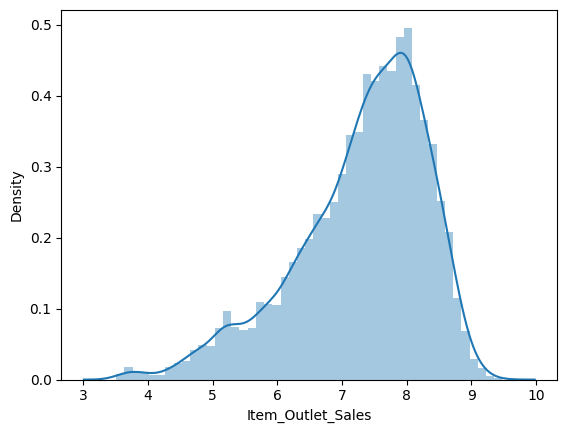

In [23]:
# Log transformation
data["Item_Outlet_Sales"] = np.log(data["Item_Outlet_Sales"])
sns.distplot(data['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

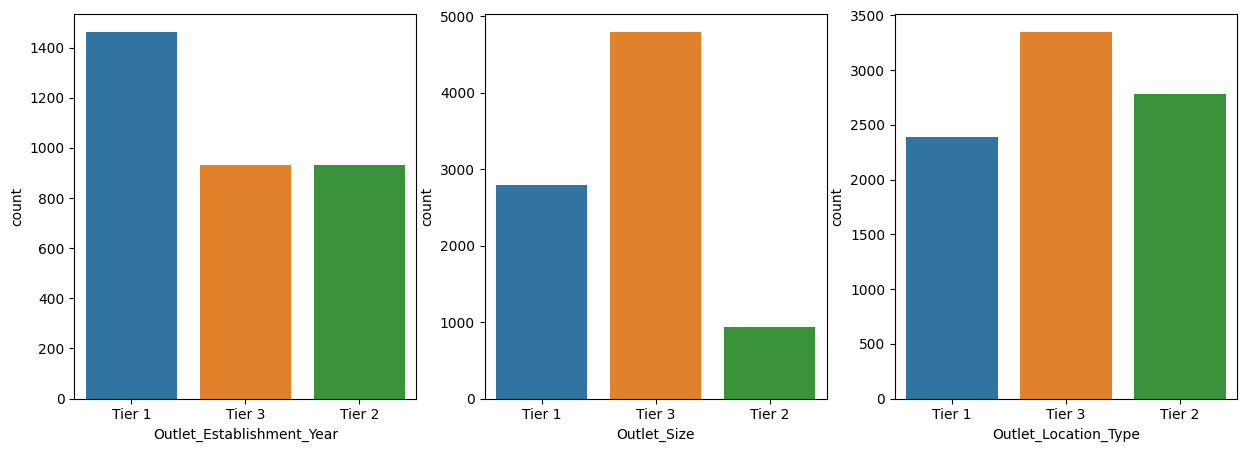

In [24]:
figure, axes = plt.subplots(1,3, sharex= True,
                            figsize = (15,5))

sns.countplot(x = data['Outlet_Establishment_Year'], ax = axes[0], data = data)
sns.countplot(x = data['Outlet_Size'], ax = axes[1],  data = data)
sns.countplot(x = data['Outlet_Location_Type'], ax = axes[2],  data = data)


<Axes: xlabel='Outlet_Type', ylabel='count'>

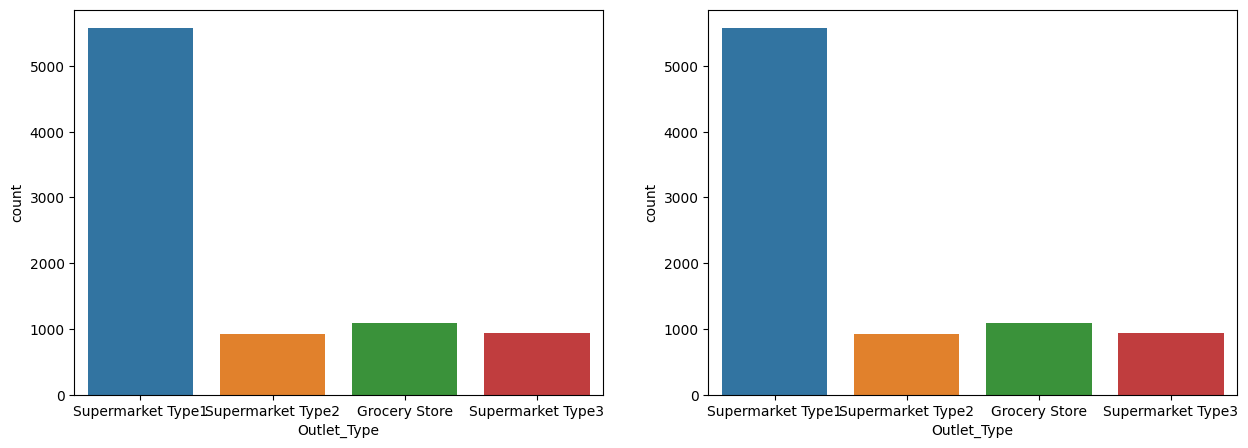

In [25]:
figure, axes = plt.subplots(1,2, sharex= True,
                            figsize = (15,5))

sns.countplot(x = data['Outlet_Type'], ax = axes[0],  data = data)
sns.countplot(x = data['Outlet_Type'], ax = axes[1], data = data)

<Axes: xlabel='Item_Type', ylabel='count'>

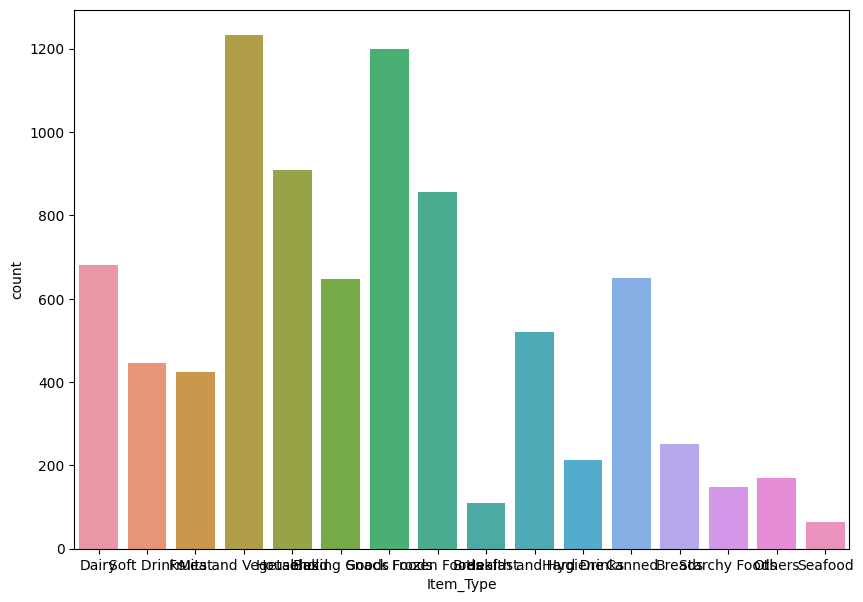

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x = data["Item_Type"], data=data)

<Axes: >

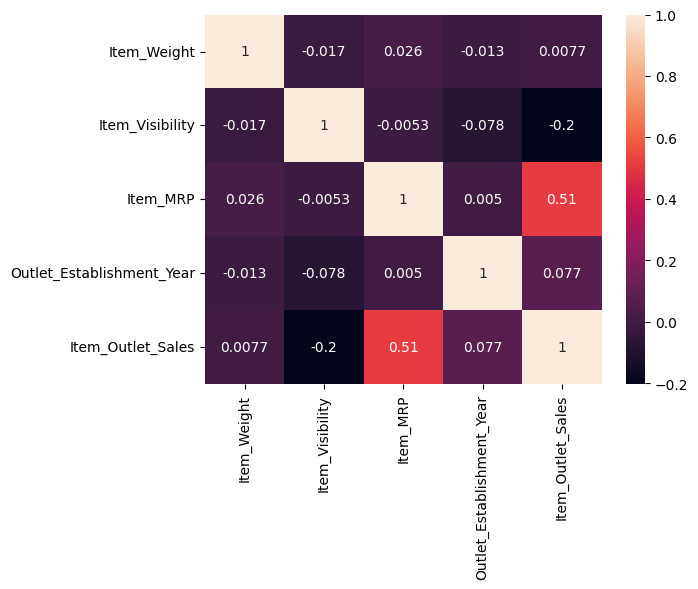

In [27]:
sns.heatmap(data.corr(), annot = True)

In [28]:
# Label Encoding 
cat_columns = data.select_dtypes(include = 'object').columns.tolist()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_columns:
    data[col] = encoder.fit_transform(data[col])

# One Hot Encoding 
data = pd.get_dummies(data, columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New attribute'])

### 5.Model Training

In [33]:
X = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']

# train test split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y , 
                                    test_size = 0.2, random_state = 42)

linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()